Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,562 (295.16 KB)

 Trainable params: 75,370 (294.41 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.2714 - loss: 1.9545 - val_accuracy: 0.4112 - val_loss: 1.5753 - learning_rate: 0.0100
Epoch 2/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.4571 - loss: 1.4893 - val_accuracy: 0.5165 - val_loss: 1.3398 - learning_rate: 0.0100
Epoch 3/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.5268 - loss: 1.3135 - val_accuracy: 0.5346 - val_loss: 1.2773 - learning_rate: 0.0100
Epoch 4/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.5708 - loss: 1.2077 - val_accuracy: 0.5416 - val_loss: 1.2579 - learning_rate: 0.0100
Epoch 5/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.5929 - loss: 1.1496 - val_accuracy: 0.6239 - val_loss: 1.0539 - learning_rate: 0.0100
Epoch 6/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 98ms/step - accuracy: 0.6114 - loss: 1.0952 - val_accuracy: 0.6368 - val_loss: 1.0415 - learning_rate: 0.0100
Epoch 7/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.6313 - l

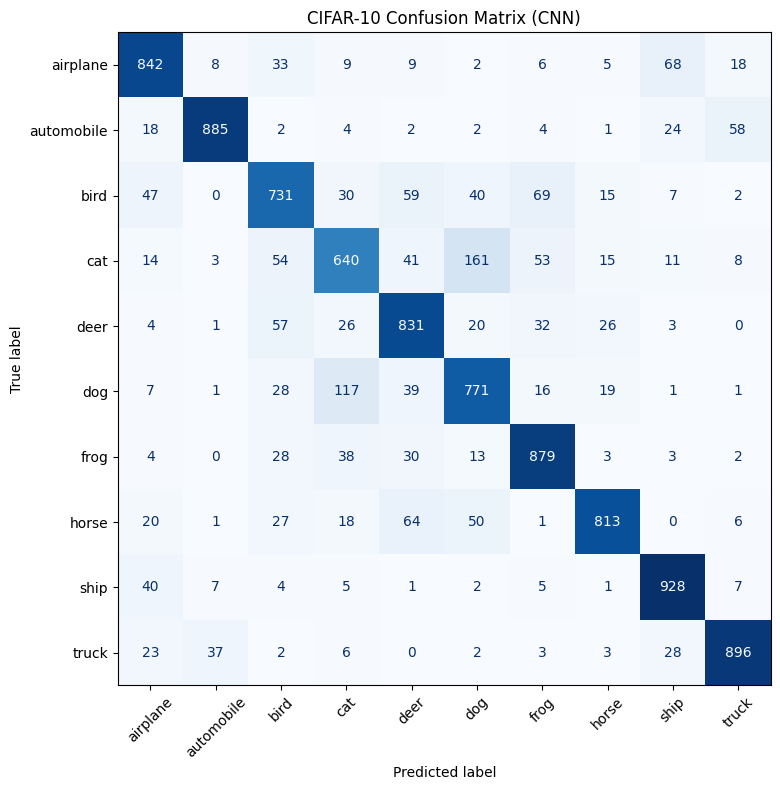

In [1]:
# --- Imports ---
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- Load CIFAR-10 ---
(num_classes, img_h, img_w, img_c) = (10, 32, 32, 3)
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Scale to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Optional: standardize per-channel (helps convergence on CIFAR-10)
# Compute mean/std from training set only to avoid leakage
mean = x_train.mean(axis=(0,1,2), keepdims=True)
std  = x_train.std(axis=(0,1,2), keepdims=True) + 1e-7
x_train = (x_train - mean) / std
x_test  = (x_test  - mean) / std

# One-hot labels for training with categorical_crossentropy
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)

# Class names for nicer reporting
class_names = np.array([
    "airplane","automobile","bird","cat","deer",
    "dog","frog","horse","ship","truck"
])

# --- Model ---
model = Sequential([
    keras.Input(shape=(img_h, img_w, img_c)),

    Conv2D(32, 3, padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(64, 3, padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),

    GlobalAveragePooling2D(),
    Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(1e-4)),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

opt = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# --- Callbacks ---
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=1),
    EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True, verbose=1),
]

# --- Train ---
history = model.fit(
    x_train, y_train_cat,
    validation_data=(x_test, y_test_cat),
    epochs=80,
    batch_size=128,
    callbacks=callbacks,
    verbose=1
)

# --- Evaluate ---
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}  |  Test loss: {test_loss:.4f}")

# --- Predictions for reports ---
y_prob = model.predict(x_test, verbose=0)
y_pred = np.argmax(y_prob, axis=1).reshape(-1)
y_true = y_test.reshape(-1)

# --- Classification report ---
print("\nClassification Report (per class):")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

# --- Confusion matrix ---
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, xticks_rotation=45, cmap="Blues", colorbar=False)
ax.set_title("CIFAR-10 Confusion Matrix (CNN)")
plt.tight_layout()
plt.show()